# Analysis

Not the predict thing, the thing that generates a series of images and does things with similarity and stuff

**DO NOT CLICK RUN ALL - It'll do you no good**

In [1]:
# imports
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
from tqdm import tqdm

from model import CycleGan, GenType
from loader import Sampler, Loader

In [3]:
# setup and loading networks

gens = [
    [GenType.UNET, "./run/0004/weights/weights-21.h5"],
    [GenType.RESNET, "./run/0005-RESNET/weights/weights-65.h5"],
    [GenType.DEFORMDENS, "./run/0010-DEFORM-DENS/weights/weights-60.h5"],
    [GenType.HCDENS, "./run/0012-DENS/weights/weights-72.h5"],
    [GenType.HCDENS, "./run/0017-DENSENET-MSLE/weights/weights-80.h5"]
]

gans = []
for t, loc in tqdm(gens):
    gan = CycleGan(genType=t)
    gan.loadCombinedFromCheckpoint(loc)
    gans.append(gan)

100%|██████████| 5/5 [00:16<00:00,  3.24s/it]


In [2]:
# other things and setup

from typing import List

loader = Loader(None, None)
sampler = Sampler("./data/simkai.ttf")

def getimg(i):
    im = loader.imread(i, cv2.IMREAD_ANYCOLOR)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def getImages(string, gans, columns=-1):
    out: List[np.ndarray] = []
    originals = np.array(sampler.generateImages(string))
    for gan in tqdm(gans):
        converted = gan.predict(sampler, string)
        stitched = sampler.stitchImages(converted, columns=len(string) if columns == -1 else columns)
        out.append(stitched)
    return originals, out

# Automatic Generation

In [4]:
def generateImages(string, gans, columns=-1):
    # generate images
    orig, cvtd = getImages(string, gans, columns)
    origstitched = sampler.stitchImages(orig, columns=len(string) if columns == -1 else columns)
    
    # save images
    outPath = "./images/genRuns/"
    cv2.imwrite(outPath + "-原-" + string + ".png", origstitched)
    for i, im in enumerate(cvtd):
        nom = gens[i][1].split("/")[2] + string + ".png"
        cv2.imwrite(outPath + nom, im*255)
        
    # plot images
    plt.figure()
    plt.imshow(origstitched)

    for im in cvtd:
        plt.figure()
        plt.imshow(im)

  0%|          | 0/5 [00:00<?, ?it/s]

Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 19ms/step
Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 25ms/step


 40%|████      | 2/5 [00:00<00:00, 18.18it/s]

Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 421ms/step
Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 17ms/step


 80%|████████  | 4/5 [00:00<00:00,  5.73it/s]

Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 17ms/step


100%|██████████| 5/5 [00:00<00:00,  7.29it/s]

Output shape: (5, 128, 128, 3)


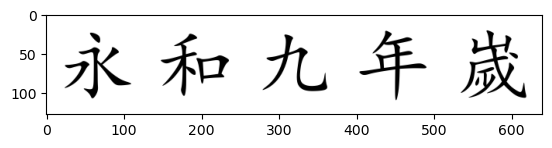

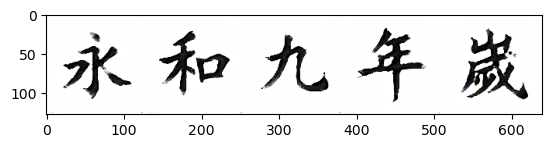

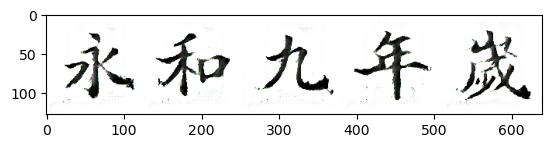

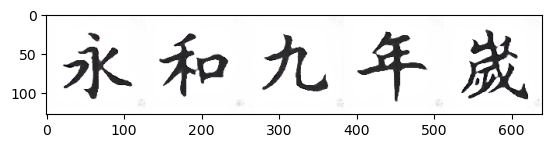

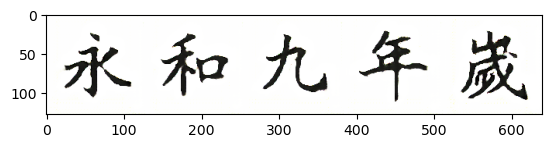

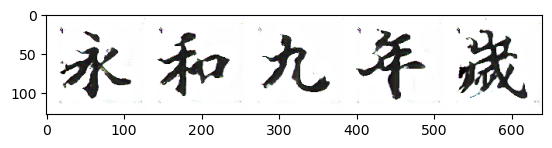

In [6]:
string = "永和九年嵗"
# string = "四體不勤五穀不分"
# string = "二简将餐简化为歺"
# string = "天不生我许新年大奉万古如长夜"

generateImages(string, gans, columns=-1)

# Manual Generation

In [6]:
# generated images

orig, cvtd = getImages("四體不勤五穀不分", gans)

  0%|          | 0/5 [00:00<?, ?it/s]

Images shape: (8, 128, 128, 3)
1/1 [==============================] - 0s 320ms/step


2023-02-21 21:28:48.706826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
 20%|██        | 1/5 [00:00<00:01,  2.62it/s]

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)
1/1 [==============================] - 1s 527ms/step


2023-02-21 21:28:49.237327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:28:49.370587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:49.370644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 23502 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-02-21 21:28:49.372480: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:49.372519: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)


2023-02-21 21:28:50.227683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:28:50.539517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:50.539575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 23502 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-02-21 21:28:50.540438: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:50.540476: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

1/1 [==============================] - 4s 4s/step


 60%|██████    | 3/5 [00:04<00:03,  1.91s/it]

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)
1/1 [==============================] - 0s 251ms/step


2023-02-21 21:28:53.217333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:28:53.283785: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:53.283844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 23502 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-02-21 21:28:53.284981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:53.285021: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)
1/1 [==============================] - 0s 246ms/step


2023-02-21 21:28:53.513917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:28:53.579076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:53.579134: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 23502 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-02-21 21:28:53.579928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:53.579966: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

Output shape: (8, 128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


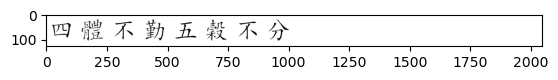

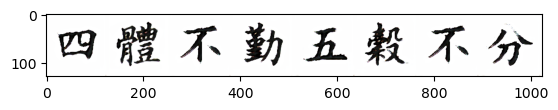

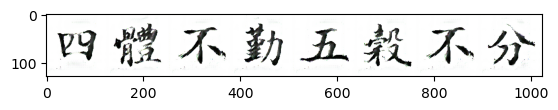

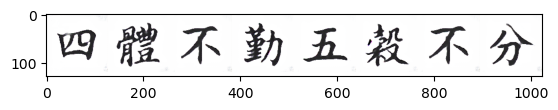

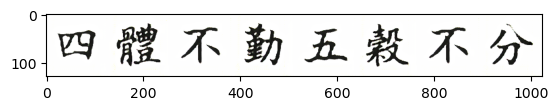

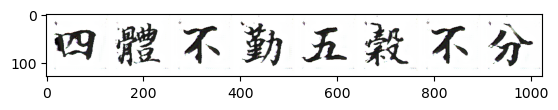

In [8]:
plt.figure()
plt.imshow(sampler.stitchImages(orig, columns=8))

for im in cvtd:
    plt.figure()
    plt.imshow(im)

In [10]:
outPath = "./images/genRuns/"

for i, im in enumerate(cvtd):
    nom = gens[i][1].split("/")[2] + ".png"
    cv2.imwrite(outPath + nom, im*255)

# VCCG

In [10]:
from glob import glob

string = "永和九年嵗"

originals = sampler.generateImages(string) / 255

references = []

for path in glob("./data/b/*")[:5]:
    img = loader.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128,128), interpolation=cv2.INTER_CUBIC)
    img = np.repeat(img[:, :, np.newaxis], 3, axis=2)
    references.append(img)

references = np.array(references)

ganOuts = []

for gan in tqdm(gans):
    converted = gan.predict(sampler, string)
    ganOuts.append(converted)
    
ganOuts = np.array(ganOuts)

  0%|          | 0/5 [00:00<?, ?it/s]

Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 21ms/step
Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 26ms/step


 40%|████      | 2/5 [00:00<00:00, 15.68it/s]

Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 414ms/step
Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 17ms/step


 80%|████████  | 4/5 [00:00<00:00,  5.57it/s]

Output shape: (5, 128, 128, 3)
Images shape: (5, 128, 128, 3)
1/1 [==============================] - 0s 21ms/step


100%|██████████| 5/5 [00:00<00:00,  6.99it/s]

Output shape: (5, 128, 128, 3)


In [12]:
import tensorflow as tf
keras = tf.keras 
from keras.applications import VGG16
from keras.models import Model

# vgg16
vgg16 = VGG16(weights="imagenet",
              include_top=True, 
              pooling="max",
              input_shape=(224,224,3))  # has to be 224 224
# extract fc2 layer
baseModel = Model(inputs=vgg16.input,
                  outputs=vgg16.get_layer("fc2").output)

baseModel.summary()

553467096/553467096 [==============================] - 60s 0us/step
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                         

In [34]:
import scipy

def getFeatureVec(im):
    im1 = cv2.resize(im, (224,224), interpolation=cv2.INTER_CUBIC)
    fv = baseModel.predict(im1.reshape(1, 224,224,3))
    return fv
    
def calculateCosSimilarity(a, b):
    """Calculates the cosine similarity: how close in angle terms the two vectors are"""
    return 1 - scipy.spatial.distance.cosine(a, b)

def calculateSSD(a,b):
    """calcualtes sum of squared differences"""
    return np.sum(np.square(a - b))

# calculate similarity
reference_fvs = [np.squeeze(getFeatureVec(i).transpose(), axis=-1) for i in references]

cosine_sims = []
ssd_sims = []

for _, genImages in enumerate(ganOuts):
    im_cosine_sims = []
    im_ssd_sims = []
    for i, im in enumerate(genImages):
        translated_fv = getFeatureVec(im).transpose().squeeze(-1)
        im_cosine_sims.append(calculateCosSimilarity(translated_fv, reference_fvs[i]))
        im_ssd_sims.append(calculateSSD(translated_fv, reference_fvs[i]))

    ssd_sims.append((np.mean(im_ssd_sims), im_ssd_sims))
    cosine_sims.append((np.mean(im_cosine_sims), im_cosine_sims))
    
print("\nCOSINE SIMS\n")
for i in cosine_sims: print(i)
print("\nSSD DIFFS\n")
for i in ssd_sims: print(i)

1/1 [==============================] - 0s 15ms/step

COSINE SIMS

(0.9899254679679871, [0.99434894323349, 0.9933638572692871, 0.9872829914093018, 0.9880163073539734, 0.9866152405738831])
(0.9886796474456787, [0.9928234815597534, 0.9933467507362366, 0.9872546195983887, 0.9854298830032349, 0.98454350233078])
(0.9873770833015442, [0.9908626675605774, 0.9903243780136108, 0.9882348775863647, 0.9853065013885498, 0.9821569919586182])
(0.9879473924636841, [0.9915521740913391, 0.9923616051673889, 0.9872060418128967, 0.9843897223472595, 0.9842274188995361])
(0.9839221954345703, [0.9867042899131775, 0.9859076142311096, 0.9847920536994934, 0.981118381023407, 0.9810886383056641])

SSD DIFFS

(46.730247, [27.023134, 29.565788, 58.389404, 57.99041, 60.682507])
(52.535828, [32.353214, 29.608248, 58.549442, 72.108345, 70.05989])
(57.695984, [41.290348, 43.038437, 53.783623, 69.65608, 80.71146])
(55.337048, [38.501266, 33.98384, 58.836308, 73.85709, 71.50673])
(73.83822, [61.494415, 62.925117, 69.52002,

In [40]:
from skimage.metrics import structural_similarity as ssim 

ssimSims = []

for genResult in ganOuts:
    singleSSIMs = []
    for i, im in enumerate(genResult):
        singleSSIMs.append(ssim(im, references[i], channel_axis=2))
    ssimSims.append((np.mean(singleSSIMs), singleSSIMs))
    
print("\nSSIM SIMILARITIES\n")
for i in ssimSims: print(i)


SSIM SIMILARITIES

(0.59968483, [0.62751913, 0.52073973, 0.72338647, 0.63825923, 0.48851967])
(0.58005095, [0.6091612, 0.50482076, 0.69625616, 0.62773, 0.46228656])
(0.6009034, [0.6248044, 0.5292426, 0.7245236, 0.64597994, 0.47996673])
(0.59951526, [0.62747645, 0.52964884, 0.7240085, 0.64036214, 0.47608033])
(0.58163875, [0.59780836, 0.50589055, 0.71102506, 0.61925024, 0.47421947])


In [42]:
print("Cosine similarity: higher the better ; SSD difference, the lower the better ; SSIM is SSIM")
for i in range(len(cosine_sims)):
    print(f"Gen {gens[i][0]} : [avg cos-sim {cosine_sims[i][0]:.5f}] [avg ssd-dif {ssd_sims[i][0]:.3f}] [avg image-ssim {ssimSims[i][0]:.4f}]")

Cosine similarity: higher the better ; SSD difference, the lower the better ; SSIM is SSIM
Gen GenType.UNET : [avg cos-sim 0.98993] [avg ssd-dif 46.730] [avg image-ssim 0.5997]
Gen GenType.RESNET : [avg cos-sim 0.98868] [avg ssd-dif 52.536] [avg image-ssim 0.5801]
Gen GenType.DEFORMDENS : [avg cos-sim 0.98738] [avg ssd-dif 57.696] [avg image-ssim 0.6009]
Gen GenType.HCDENS : [avg cos-sim 0.98795] [avg ssd-dif 55.337] [avg image-ssim 0.5995]
Gen GenType.HCDENS : [avg cos-sim 0.98392] [avg ssd-dif 73.838] [avg image-ssim 0.5816]
